<h1> <img src='img/py.png' width=50> Seminario de Lenguaje Python </h1>
    
<mark>Alumno:</mark> Sirai Juan Bautista <br>
<mark>Legajo:</mark> 20196/3
    
<img src='img/cat-typing.gif' width="800" alt='Python Banner'>
<h3> Ejercicio 10 </h3>

**Consigna:** <br>

Trabajando con los contenidos de los archivos que pueden acceder en el curso:
* Nombres
* Eval1
* Eval2
    
Manipule estos archivos para realizar lo siguiente:
* Generar una estructura con los nombres de los estudiantes y la suma de ambas notas.
* Calcular el promedio de las notas totales e informar que alumnos obtuvieron menos que el
promedio.

-------------------------------------------------------------------------------------------

<h2> Indice de contenidos </h2>

* [Apertura y Lectura de Archivos](#apertura)
* [Generación de Nueva Estructura](#genera_estructura)
* [Calculo del promedio e Informe](#promedio)
* [Bonus!](#bonus)

----------------------------------------------------------------------------------------------

<h2>🎯 Apertura y Lectura de archivos </h2> <a class="anchor" id="apertura"></a>

En esta sección, vamos a proceder a leer cada uno de los txt proporcionados, y a almacenarlos en una <mark>estructura de listas</mark>, sabiendo que:
* a cada indice de la **lista de nombres**, le correspondera la nota almacenada en **dicho índice** en las listas de evaluaciones 1 y evaluaciones 2.
* las tres listas poseen la misma cantidad de elementos.

Dado que en los txt se almacena un **espacio en blanco** al final de todos los archivos, en nuestras listas omitiremos almacenar dicho espacio en blanco, mediante la técnica de **slice**:  ```lista[:-1]```

Como paso de pre-procesamiento, definiremos una función que limpie nuestros txt de aquellos caracteres indeseados:

```python
def clean(diccionario, texto):
    for i, j in diccionario.items():
        texto = texto.replace(i,j)
    return texto
```

En donde **diccionario**, no es más que el mapeo de los caracteres que queremos sustituir y su respectivo reemplazo

```python
diccionario = {
    "'": "",
    ",": "",
    " ": ""
}
```

In [37]:
# Definimos una pequeña función para limpiar el txt de nombres, de aquellos caracteres indeseados.

diccionario = {
    "'": "",
    ",": "",
    " ": ""
}

def clean(diccionario, texto):
    for i, j in diccionario.items():
        texto = texto.replace(i,j)
    return texto

Mediante el método ```with open()```, procederemos a la apertura de cada uno de los tres txt, y los convertiremos a lista.<br>
Tal lo comentado en el punto anterior, mediante un encademamiento vamos a generar en una misma linea el resultado deseado:
* funcion clean --> obtengo texto limpio --> convierto a mayuscula --> convierto a lista separando por el escape de linea --> omito el ultimo espacio en blanco

In [38]:
# Lista de estudiantes

with open('data/nombres_1.txt', 'r',encoding="utf-8") as f:
    lista_estudiantes = clean(diccionario, f.read()).upper().split('\n')[:-1]
    
# Lista de notas 1
with open('data/eval1.txt', 'r', encoding="utf-8") as f:
    lista_notas1 = clean(diccionario, f.read()).split('\n')[:-1]
    
# Lista de notas 2

with open('data/eval2.txt', 'r', encoding="utf-8") as f:
    lista_notas2 = clean(diccionario, f.read()).split('\n')[:-1]

Mostramos por pantalla las listas generadas: 

In [39]:
print(f"{'Nombre':<10} {'Ev 1':<5} {'Ev 2':<5}")
print('-----------------------------------------')
for i in range(len(lista_estudiantes)):
    print(f"{lista_estudiantes[i]:<10} {lista_notas1[i]:<5} {lista_notas2[i]:<5}")
    # (12-len(lista_estudiantes[i])) es utilizado solamente a fines de alinear en columnas. Agrego la cantidad 
    # de espacios necesarias para que cada impresión del nombre tenga 12 caracteres.

Nombre     Ev 1  Ev 2 
-----------------------------------------
AGUSTIN    81    30   
ALAN       60    95   
ANDRÉS     72    28   
ARIADNA    24    84   
BAUTISTA   15    84   
CAROLINA   91    43   
CESAR      12    66   
DAVID      70    51   
DIEGO      29    4    
DOLORES    42    11   
DYLAN      16    58   
ELIANA     3     10   
EMANUEL    35    13   
FABIÁN     67    34   
FACUNDO    10    96   
FACUNDO    57    71   
FEDERICO   11    86   
FEDERICO   69    37   
GONZALO    12    64   
GREGORIO   77    13   
IGNACIO    13    8    
JONATHAN   86    87   
JONATHAN   48    14   
JORGE      65    14   
JOSE       51    49   
JUAN       41    27   
JUAN       87    55   
JUAN       43    69   
JULIAN     10    77   
JULIETA    87    59   
LAUTARO    91    57   
LEONEL     15    40   
LUIS       44    96   
LUIS       85    24   
MARCOS     73    30   
MARÍA      37    73   
MATEO      42    95   
MATIAS     95    19   
NICOLÁS    18    47   
NICOLÁS    7     15   
NOELIA     74  

------------------------------------------------------------------------------------------------------------
<h2>🎯 Generación de Estructura.</h2><a class="anchor" id="genera_estructura"></a>

Para desarrollar este punto, lo que haremos será confeccionar una función que nos permita **consolidar** las notas de cada alumno, en donde  ```nota consolidada = nota ev1 + nota ev2```.

Dicha función, que la llamaremos ```consolidar_notas()```, recibirá como **parametros 3 listas**: 
* la lista de nombres
* la lista de notas1
* la lista de notas2

Y retornará un único **diccionario**, conformada por ```id_alumno: nota1 + nota2```

En donde:
* id_alumno: es la clave del diccionario. Al nombre de cada alumno le agregaremos un ID autogenerado, ya que caso contrario el diccionario nos agruparía aquellos alumnos de igual nombre (ya que permite solamente claves unicas)
* nota1 + nota2 es el valor asociado a cada clave

El diccionario lo crearemos bajo la técnica de dict comprehension, y utilizaremos la función ```zip()```, que al pasarle las dos listas de notas nos creará una lista de tuplas sobre las cuales iterar.


In [46]:
def consolidar(alumnos:list, notas1:list, notas2:list):
    values = [int(x) + int(y) for x,y in zip(notas1, notas2)]
    keys = [f"{i}_{alumnos[i]}" for i in range(len(alumnos))]
    resultado = dict(zip(keys, values))
    return resultado

In [48]:
# nueva_estructura = consolidar_notas(lista_estudiantes, lista_notas1, lista_notas2)
nueva_estructura = consolidar(lista_estudiantes, lista_notas1, lista_notas2)

print(f"Nueva estructura \n\n👨‍🎓Alumnos\n\n{nueva_estructura.keys()}\n\n📝Notas\n\n{nueva_estructura.values()}\n\n")

print("Procederemos a imprimir las notas para cada alumno: ")
for keys, values in nueva_estructura.items():
    print(f"👨‍🎓Alumno: {keys :<20} 📝Nota: {values}")

Nueva estructura 

👨‍🎓Alumnos

dict_keys(['0_AGUSTIN', '1_ALAN', '2_ANDRÉS', '3_ARIADNA', '4_BAUTISTA', '5_CAROLINA', '6_CESAR', '7_DAVID', '8_DIEGO', '9_DOLORES', '10_DYLAN', '11_ELIANA', '12_EMANUEL', '13_FABIÁN', '14_FACUNDO', '15_FACUNDO', '16_FEDERICO', '17_FEDERICO', '18_GONZALO', '19_GREGORIO', '20_IGNACIO', '21_JONATHAN', '22_JONATHAN', '23_JORGE', '24_JOSE', '25_JUAN', '26_JUAN', '27_JUAN', '28_JULIAN', '29_JULIETA', '30_LAUTARO', '31_LEONEL', '32_LUIS', '33_LUIS', '34_MARCOS', '35_MARÍA', '36_MATEO', '37_MATIAS', '38_NICOLÁS', '39_NICOLÁS', '40_NOELIA', '41_PABLO', '42_PRISCILA', '43_TOMAS', '44_TOMÁS', '45_ULISES', '46_YANINA'])

📝Notas

dict_values([111, 155, 100, 108, 99, 134, 78, 121, 33, 53, 74, 13, 48, 101, 106, 128, 97, 106, 76, 90, 21, 173, 62, 79, 100, 68, 142, 112, 87, 146, 148, 55, 140, 109, 103, 110, 137, 114, 65, 22, 105, 99, 24, 139, 126, 120, 84])


Procederemos a imprimir las notas para cada alumno: 
👨‍🎓Alumno: 0_AGUSTIN            📝Nota: 111
👨‍🎓Alumno: 1_ALAN

---------------------------------------------------------------------------------------------------------
<h2>🎯 Calculo del Promedio e Informe</h2><a class="anchor" id="promedio"></a>

Para desarrollar este punto, lo que haremos será:
* Construir una función que retorne el promedio de los elementos de un diccionario pasado como parámetro.
* Recorreremos la estructura consolidada generada en el punto anterior, y en cada iteración compararemos si la nota que hay en el iterable, es o no inferior al promedio.<br> En aquellos casos que la comparación resulte verdadera, podemos obtener el nombre del alumno con tan solo imprimir la clave la estructura consolidada.

In [49]:
def calcular_promedio(diccionario:dict):
    total = 0
    for num in diccionario.values():
        total+=num
    print(len(diccionario))
    return total/len(diccionario)

In [51]:
promedio = calcular_promedio(nueva_estructura)

print(f"Los siguientes alumnos obtuvieron notas inferiores al promedio de {round(promedio,2)}: ")
for key, values in nueva_estructura.items():
    if values<promedio:
        print(f"🚩Alumno {key :<20} Nota: {values}")

47
Los siguientes alumnos obtuvieron notas inferiores al promedio de 96.19: 
🚩Alumno 6_CESAR              Nota: 78
🚩Alumno 8_DIEGO              Nota: 33
🚩Alumno 9_DOLORES            Nota: 53
🚩Alumno 10_DYLAN             Nota: 74
🚩Alumno 11_ELIANA            Nota: 13
🚩Alumno 12_EMANUEL           Nota: 48
🚩Alumno 18_GONZALO           Nota: 76
🚩Alumno 19_GREGORIO          Nota: 90
🚩Alumno 20_IGNACIO           Nota: 21
🚩Alumno 22_JONATHAN          Nota: 62
🚩Alumno 23_JORGE             Nota: 79
🚩Alumno 25_JUAN              Nota: 68
🚩Alumno 28_JULIAN            Nota: 87
🚩Alumno 31_LEONEL            Nota: 55
🚩Alumno 38_NICOLÁS           Nota: 65
🚩Alumno 39_NICOLÁS           Nota: 22
🚩Alumno 42_PRISCILA          Nota: 24
🚩Alumno 46_YANINA            Nota: 84


---------------------------------------------------------------------------------------------------------
<h2>🎯 Bonus: Y si aplicamos Pandas? 🐼</h2><a class="anchor" id="bonus"></a>

In [59]:
import pandas as pd

In [208]:
df_notas1 = pd.read_csv('data/eval1.txt',engine='python',delimiter='\n' ,names=['notas1'])
df_notas2 = pd.read_csv('data/eval2.txt',engine='python',delimiter='\n' ,names=['notas2'])
df_alumnos = pd.read_csv('data/nombres_1.txt',engine='python',delimiter='\n' ,names=['alumno'],encoding="utf-8")

# quitamos la , del final de cada nota y convertimos a numero
df_notas1['notas1'] =  df_notas1.notas1.apply(lambda x: int(x.replace(",","")))
df_notas2['notas2'] =  df_notas2.notas2.apply(lambda x: int(x.replace(",","")))

# quitamos la , del final de cada nombre, y las ''
df_alumnos['alumno'] =  df_alumnos.alumno.apply(lambda x: x.replace(",","").replace("'",""))

In [210]:
# concatenamos en un solo dataframe

df = pd.concat([df_alumnos, df_notas1, df_notas2], axis=1)

# generamos la tercera columna
df['total'] = df.notas1 + df.notas2

# mostramos los alumnos cuyas notas son inferior al promedio

print(f"Alumnos cuyas notas son inferior al promedio {df.total.mean().round(2)}")

df.loc[df.total<df.total.mean()]

Alumnos cuyas notas son inferior al promedio 96.19


,alumno,notas1,notas2,total
6,CESAR,12,66,78
8,Diego,29,4,33
9,Dolores,42,11,53
10,DYLAN,16,58,74
11,ELIANA,3,10,13
12,Emanuel,35,13,48
18,GONZALO,12,64,76
19,Gregorio,77,13,90
20,Ignacio,13,8,21
22,Jonathan,48,14,62


<h3> Una imagen vale mas que mil palabras.. </h3>

In [223]:
# Importamos seaborn y pyplot para graficar

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

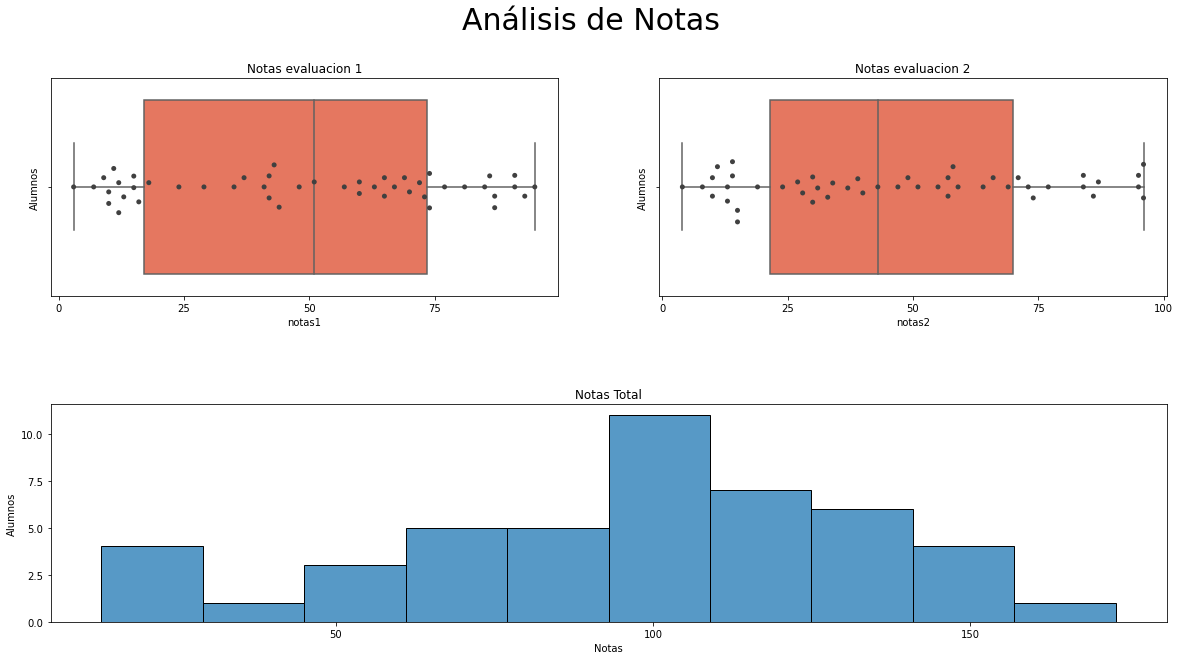

In [245]:
fig = plt.figure(1)
plt.suptitle('Análisis de Notas',fontsize=30)
gridspec.GridSpec(2,2)

# Subplot Pequeño
plt.subplot2grid((2,2), (0,0), colspan=1, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Notas evaluacion 1')
plt.xlabel('Notas')
plt.ylabel('Alumnos')
ax = sns.swarmplot(data=df, x='notas1', color=".25")
ax = sns.boxplot(data=df, x='notas1',palette='Reds')

# Subplot Pequeño
plt.subplot2grid((2,2), (0,1), colspan=1, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Notas evaluacion 2')
plt.xlabel('Notas')
plt.ylabel('Alumnos')
ax = sns.swarmplot(data=df, x='notas2', color=".25")
sns.boxplot(data=df, x='notas2',palette='Reds')

# Subplot Largo
plt.subplot2grid((2,2), (1,0), colspan=2, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Notas Total')
plt.xlabel('Notas')
plt.ylabel('Alumnos')
sns.histplot(data=df, x='total',palette='Reds', bins=10)

#Ajustando el plot
fig.set_size_inches(w=20,h=10)
plt.subplots_adjust(hspace=.5)
plt.show()

Como podemos ver en la imagen, la mediana de notas en la evaluación 1 fue ligeramente superior a la evaluación dos.

In [246]:
print(f"Indicadores evaluación 1 \nPromedio: {df.notas1.mean().round(2)}\nMax: {df.notas1.max()}\nMin:\
{df.notas1.min()}\n\nIndicadores evaluación 2\nPromedio: {df.notas2.mean().round(2)}\nMax: {df.notas2.max()}\nMin:\
{df.notas2.min()}")

Indicadores evaluación 1 
Promedio: 49.55
Max: 95
Min:3

Indicadores evaluación 2
Promedio: 46.64
Max: 96
Min:4


-------------------------------------------------------------------------------------
<img src="img/banner1.jpg">

-------------------------------------------------------------------------------------